# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [10]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.20.0


### Creating data to view and fit

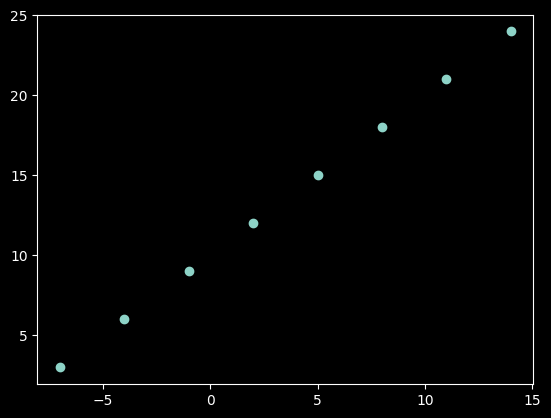

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
X = tf.cast(X, dtype= tf.float32)
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
y = tf.cast(y, dtype= tf.float32)

# Visualize it
plt.scatter(X,y)

In [12]:
y == X+10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

In [13]:
# Create a tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [14]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [15]:
X[1], y[1]


(<tf.Tensor: shape=(), dtype=float32, numpy=-4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [16]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [17]:
X[0].ndim

0

In [18]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
input_shape = X[0].shape #type:ignore
output_shape = y[0].shape #type:ignore
input_shape, output_shape

(TensorShape([]), TensorShape([]))

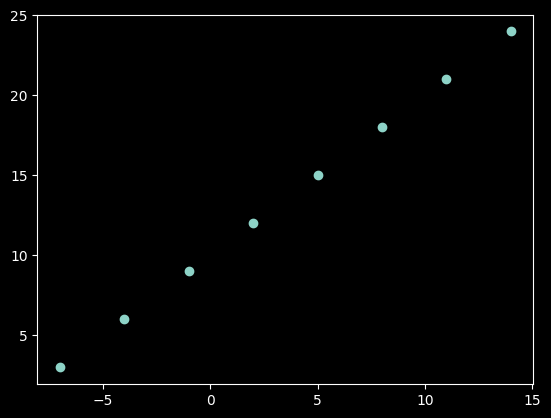

In [20]:
plt.scatter(X,y) #type:ignore

## Steps in modeling with TensorFlow

1. **Creating a model**
    - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**
    - define the loss function (in other words the function which tells our model how wrong it is)
    - define the optimizer (tells our model how to improve the patterns its learning)
    - define the metrics (what we can use to interpret the performance of our model )
3. **Fitting a model**
    - letting the model try to find patterns between X and Y (features and labels)

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae -> mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - loss: 18.0101 - mae: 18.0101


In [22]:
# Checkout x and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Try and make a prediction using our model
predict = tf.constant([17.0])
y_pred = model.predict(predict)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[-16.132774]], dtype=float32)

### Improving our model
We can improve our mode, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the numbers of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [24]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.050),
    metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step - loss: 12.7263 - mae: 12.7263
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.5119 - mae: 5.5119
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.0667 - mae: 4.0667
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.9712 - mae: 4.9712
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.9629 - mae: 4.9629
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.5785 - mae: 4.5785
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.3418 - mae: 3.3418
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.5734 - mae: 2.5734
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.3697 - mae: 2.3697
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.0600 - mae: 2.0600
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.8858 - mae: 1.8858
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2.8052 - mae: 2.8052
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/

In [25]:
#remind ourselves the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
# Let's see if our model's prediction has improved...
predict = tf.constant([17.0])
model.predict(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[28.7922]], dtype=float32)

In [27]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss = "mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs= 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 14.3984 - mae: 14.3984
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13.6561 - mae: 13.6561
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.9178 - mae: 12.9178
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.1821 - mae: 12.1821
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.4468 - mae: 11.4468
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.7095 - mae: 10.7095
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.9676 - mae: 9.9676
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.2185 - mae: 9.2185
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.4593 - mae: 8.4593
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.6871 - mae: 7.6871
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.8991 - mae: 6.8991
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.6576 - mae: 6.6576
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [28]:
# Let's remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [29]:
prd = tf.constant([17])
model.predict(prd)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[26.85124]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll through when building neural networks is:


`Build a model` -> `fit it -> evaluate it -> tweak a model` -> `fit it -> evaluate it -> tweak a model` -> `fit it -> evaluate it...`



## When it comes evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize,"

### It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does it look like?
* The training of a model - how does a model preform while it learns?
* The predictions of the model - how do the predictions of a model line up against the grand truth (the original labels) ?

In [30]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [31]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

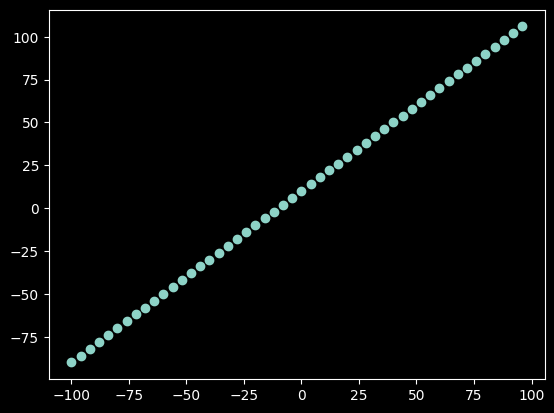

In [32]:
# Visualize the data
plt.scatter(X,y)

### The 3 sets...


* **Training set** - the model learns from this data, which is
typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is
typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test
what is has learned, this set is typically 10-15% of the total
data available.

In [33]:
# Check the length of how many samples we have
len(X)

50

In [34]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data
Now we're got our data in training and test sets... let's visualize it again

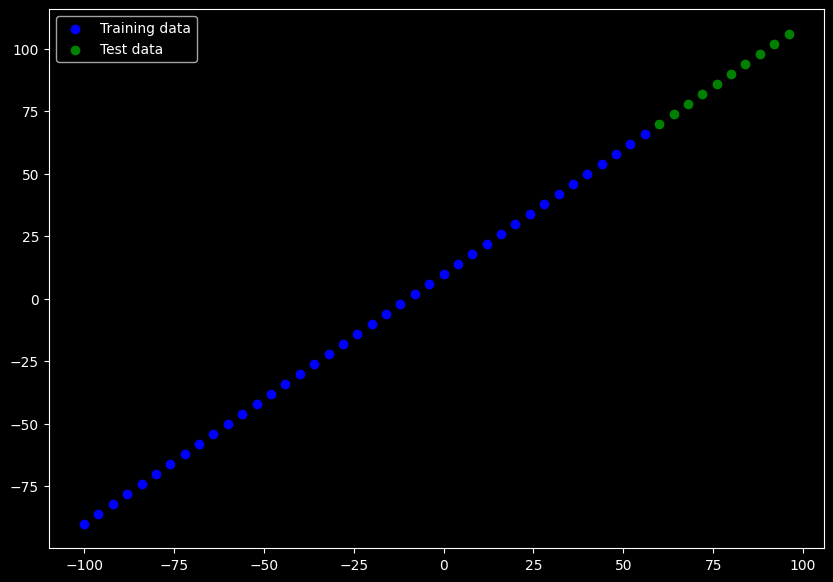

In [35]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label= "Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label= "Test data")
plt.legend()

In [36]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

## Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [37]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [39]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])


tf.config.list_physical_devices

<function tensorflow.python.framework.config.list_physical_devices(device_type=None)>

In [40]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns)
the model can update as it trains.
* Non-trainable params - these parameters aren't updated
during training (this is typical when you bring in already
learn patterns or parameters from other models during
**transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable
parameters within a layer, check out MIT's introduction to
deep learning video.

🛠️ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [41]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 95.3654 - mae: 95.3654   
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 60.5899 - mae: 60.5899
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26.3849 - mae: 26.3849
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1750 - mae: 10.1750
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.7405 - mae: 11.7405
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.6139 - mae: 12.6139
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4195 - mae: 8.4195
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0968 - mae: 9.0968
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.9204 - mae: 7.9204
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.8786 - mae: 10.8786
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.6684 - mae: 7.6684
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.9303 - mae: 11.9303
Epoch 13/100
2/2 ━━━━━━━━━━━━━

In [42]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)